In [2]:
import cv2
import numpy as np

#from google.colab.patches import cv2_imshow

# Loads an image
filename = 'oring.jpg'
src = cv2.imread(filename, cv2.IMREAD_COLOR)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

gray = cv2.medianBlur(gray, 5)

print(f'the dimenstions of gray image is \n {gray.shape} \n where "{gray.shape[0]}" denotes length and "{gray.shape[1]}" denotes width of the images')

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


In [ ]:
rows = gray.shape[0]

"""
changes done to the origin params
minDist = rows / 4 --> dist btw 2 circles
(chnaged)minDist = rows / 8 --> as it was taking too much time

param1 = 
param2 = 
minRadius = 1000 --> similar to minDist
maxRadius = 4032 --> max of length
"""

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist = rows / 8,
						   param1=100, param2=30,
						   minRadius=300, maxRadius=700)

In [ ]:
circles

array([[[1511.5, 1884.5,  646.6],
        [2605.5, 2662.5,  402.3]]], dtype=float32)

change to old values
* minDist = rows / 8
* OD radius in MS paint is 1420px(1420- 1433px) so the maxRadius should be less than 1420
* minradius should be 100 less than that (approx)
* the cross section is almost 65 px

In [ ]:
if circles is not None:
	circles = np.uint16(np.around(circles))
	for i in circles[0, :]:
		center = (i[0], i[1])
		# circle center
		cv2.circle(src, center, 1, (0, 100, 100), 3)
		# circle outline
		radius = i[2]
		cv2.circle(src, center, radius, (255, 0, 255), 3)


cv2_imshow(src)
#cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

minRadius = 300
maxRadius = 700
<br>
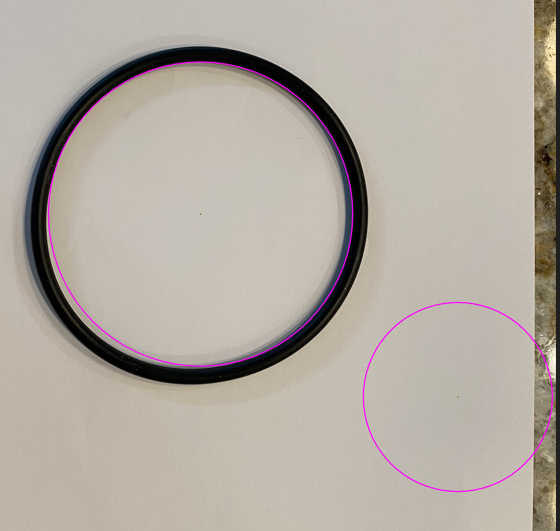



## iteration 4 - using image segmentation



Read about image segmentation and try out segmenting the image then using the segmentated image to find the radius.

* question to answer:
    * how to detect the outer circle?
    * how to detect the outer and inner circle simultaneously?

## Circle CUDA version ( NOt implemented)